# Taxi Trip Analysis: From Data Loading to Predictive Modeling and Feature Importance

In this data science project, I began by loading taxi trip data directly from a specified URL and proceeded with essential data preparation steps, exploratory data analysis (EDA), and visualizations. Initial steps involved checking data dimensions and types, converting categorical-nominal columns to a more appropriate format, and addressing missing values through strategic removal of rows and columns. Notably, invalid data such as negative dollar amounts and outliers in trip distances were systematically handled. Following a thorough analysis of the dataset, I created visualizations, including bar charts illustrating the most common cab requesting methods and the top 5 drop-off locations. Subsequently, I selected relevant features for building a predictive model to estimate tip amounts, emphasizing a detailed breakdown of individual charges and temporal features. The dataset was then partitioned into training and testing sets for model evaluation. Employing a Random Forest regression model, I assessed the model's performance using Mean Squared Error (MSE) as the metric. Further exploration involved tuning the model by varying the number of estimators, revealing minimal impact on predictive accuracy. Additionally, I delved into feature importance analysis, identifying 'trip_distance' as the most influential feature. Overall, the project showcased a holistic approach to data science tasks, integrating data cleaning, visualization, model building, and evaluation.

Load the data directly from the URL into a DataFrame.

In [1]:
!pip install fastparquet
import fastparquet
import pandas as pd

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet"
tripdata_df = pd.read_parquet(url, engine='fastparquet')

tripdata_df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1.0,74,41,1.0,0.76,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
1,2,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1.0,74,74,1.0,0.72,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,1.0,1.0,0.0
2,2,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1.0,223,7,1.0,0.89,6.0,0.5,0.5,1.82,0.0,NaN,0.3,9.12,1.0,1.0,0.0
3,2,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1.0,145,145,1.0,1.12,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
4,2,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1.0,166,166,1.0,0.65,4.0,0.5,0.5,1.06,0.0,NaN,0.3,6.36,1.0,1.0,0.0
5,2,2020-02-01 00:04:36,2020-02-01 00:10:09,N,1.0,166,41,1.0,1.11,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
6,2,2020-02-01 00:49:36,2020-02-01 01:07:27,N,1.0,7,173,1.0,2.89,14.0,0.5,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
7,2,2020-02-01 00:21:08,2020-02-01 00:28:16,N,1.0,112,80,1.0,0.87,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
8,2,2020-02-01 00:05:16,2020-02-01 00:16:25,N,1.0,212,213,3.0,2.18,10.0,0.5,0.5,0.00,0.0,NaN,0.3,11.30,2.0,1.0,0.0
9,2,2020-02-01 00:59:48,2020-02-01 01:06:26,N,1.0,212,58,3.0,3.19,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2.0,1.0,0.0


## 2.1 Inspect the data to: 
1) identify its dimensions
2) indicate if the variables have suitable types


Explanataion for the Updates made to the dataset:
- VendorID, RatecodeID, PULocationID, DOLocationID, payment_type, and trip_type represent categorical-nominal data, and their values are codes or identifiers. Therefore, it's more appropriate to represent them as integers (Int64) rather than floating-point numbers.

- The astype('Int64') method is used to explicitly convert these columns to nullable integer data type (Int64). This allows for better representation, especially when dealing with missing values in integer columns.

- Columns related to date and time (lpep_pickup_datetime and lpep_dropoff_datetime) remain as datetime64[ns] as they accurately represent date and time information.

In [2]:
dimensions = tripdata_df.shape
print(f"Dimensions of the DataFrame: {dimensions}")

variable_types = tripdata_df.dtypes
print("\nVariable Types:")
print(variable_types)

categorical_nominal_cols = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'trip_type']
tripdata_df[categorical_nominal_cols] = tripdata_df[categorical_nominal_cols].astype('Int64')

updated_variable_types = tripdata_df.dtypes
print("\nUpdated Variable Types:")
print(updated_variable_types)

Dimensions of the DataFrame: (398632, 20)

Variable Types:
VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

Updated Variable Types:
VendorID                          Int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime 

## 2.2 Missing Values

In the first block of code, I calculated and displayed the frequency and percentage of missing values in each column of the DataFrame tripdata_df. The missing values were identified in columns like 'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', and 'congestion_surcharge'.

In [3]:
import pandas as pd

missing_values = tripdata_df.isnull().sum()

missing_percentage = (missing_values / len(tripdata_df)) * 100

missing_percentage = missing_percentage.round(2)

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_info)


                       Missing Values  Percentage
VendorID                            0        0.00
lpep_pickup_datetime                0        0.00
lpep_dropoff_datetime               0        0.00
store_and_fwd_flag              80893       20.29
RatecodeID                      80893       20.29
PULocationID                        0        0.00
DOLocationID                        0        0.00
passenger_count                 80893       20.29
trip_distance                       0        0.00
fare_amount                         0        0.00
extra                               0        0.00
mta_tax                             0        0.00
tip_amount                          0        0.00
tolls_amount                        0        0.00
ehail_fee                      398632      100.00
improvement_surcharge               0        0.00
total_amount                        0        0.00
payment_type                    80893       20.29
trip_type                       80894       20.29


In the second block of code, I identified columns with widespread missing data ('store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge'). I then dropped the rows where any of these columns have missing values using dropna(subset=columns_with_missing_data, inplace=True). This reduced the number of rows in my DataFrame to 317,738.

I then displayed the updated missing values information after removing the rows with missing values. No missing values were present in the remaining data.

In [4]:
columns_with_missing_data = ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']

tripdata_df.dropna(subset=columns_with_missing_data, inplace=True)

updated_dimensions = tripdata_df.shape
print(f"Updated Dimensions of the DataFrame: {updated_dimensions}")

updated_missing_values = tripdata_df.isnull().sum()
updated_missing_percentage = (updated_missing_values / len(tripdata_df)) * 100

updated_missing_info = pd.DataFrame({
    'Updated Missing Values': updated_missing_values,
    'Updated Percentage': updated_missing_percentage
})

print(updated_missing_info)

Updated Dimensions of the DataFrame: (317738, 20)
                       Updated Missing Values  Updated Percentage
VendorID                                    0                 0.0
lpep_pickup_datetime                        0                 0.0
lpep_dropoff_datetime                       0                 0.0
store_and_fwd_flag                          0                 0.0
RatecodeID                                  0                 0.0
PULocationID                                0                 0.0
DOLocationID                                0                 0.0
passenger_count                             0                 0.0
trip_distance                               0                 0.0
fare_amount                                 0                 0.0
extra                                       0                 0.0
mta_tax                                     0                 0.0
tip_amount                                  0                 0.0
tolls_amount              

In the third block of code, I checked if the 'ehail_fee' column is present in the DataFrame. Since it has 100% missing values, it doesn't provide any useful information. Therefore, I dropped the 'ehail_fee' column using drop('ehail_fee', axis=1, inplace=True). This reduced the number of columns in my DataFrame to 19.

In [5]:
if 'ehail_fee' in tripdata_df.columns:
    tripdata_df.drop('ehail_fee', axis=1, inplace=True)

updated_dimensions_after_dropping_them = tripdata_df.shape
print(f"Updated Dimensions of the DataFrame: {updated_dimensions_after_dropping_them}")

updated_missing_values = tripdata_df.isnull().sum()
updated_missing_percentage = (updated_missing_values / len(tripdata_df)) * 100

updated_missing_info = pd.DataFrame({
    'Updated Missing Values': updated_missing_values,
    'Updated Percentage for Dataset': updated_missing_percentage
})

print(updated_missing_info)


Updated Dimensions of the DataFrame: (317738, 19)
                       Updated Missing Values  Updated Percentage for Dataset
VendorID                                    0                             0.0
lpep_pickup_datetime                        0                             0.0
lpep_dropoff_datetime                       0                             0.0
store_and_fwd_flag                          0                             0.0
RatecodeID                                  0                             0.0
PULocationID                                0                             0.0
DOLocationID                                0                             0.0
passenger_count                             0                             0.0
trip_distance                               0                             0.0
fare_amount                                 0                             0.0
extra                                       0                             0.0
mta_tax       

## 2.3 Types of Data

In the code provided for the identification of categorical data types in the dataset, I performed an analysis to determine the nature of specific variables. Firstly, I focused on the RatecodeID variable. By extracting unique values from the RatecodeID column in the tripdata_df DataFrame, I aimed to categorize this variable. Referring to the data dictionary, which describes RatecodeID as a code indicating the type of rate used for the trip, I classified it as an Ordinal variable. This categorization aligns with the characteristic of ordinal variables, which possess a meaningful order or ranking.

Additionally, I examined the VendorID variable. Similar to the approach for RatecodeID, I inspected the unique values within the VendorID column and referred to the data dictionary. The dictionary specifies that VendorID represents a code indicating the LPEP provider that provided the record. Since there is no inherent order or ranking among these providers, I appropriately classified VendorID as a Nominal variable.


In [6]:
ratecode = 'RatecodeID'
if ratecode in tripdata_df.columns:
    unique_values = tripdata_df[ratecode].unique()
    variable_type = 'Ordinal'
    print(f"{ratecode}: {variable_type}")
    
vendor_id = 'VendorID'
if vendor_id in tripdata_df.columns:
    unique_values = tripdata_df[vendor_id].unique()
    variable_type = 'Nominal'
    print(f"{vendor_id}: {variable_type}")


RatecodeID: Ordinal
VendorID: Nominal


## 2.4 Invalid Data and Data Preparation

In the initial phase of data exploration and preparation, I focused on identifying and addressing potential issues in the dataset to ensure its suitability for analysis. One key concern was the presence of negative values in columns representing dollar amounts, including 'fare_amount', 'extra', 'mta_tax', and others. To tackle this issue, I systematically identified columns with dollar amounts and examined the existence of negative values. Subsequently, I removed rows containing negative dollar amounts using the ~ operator and the .lt(0).any(axis=1) condition. This step significantly enhanced the cleanliness of the data, resulting in an updated DataFrame with 316,617 rows.


In [7]:
dollar_amount = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

negative_amount_column = tripdata_df[dollar_amount].lt(0).sum()

print("Columns with Negative Dollar Amounts:")
print(negative_amount_column)

tripdata_df = tripdata_df[~tripdata_df[dollar_amount].lt(0).any(axis=1)]

updated_dimensions_after_removal = tripdata_df.shape
print(f"Updated Dimensions of the DataFrame are represented like this: {updated_dimensions_after_removal}")


Columns with Negative Dollar Amounts:
fare_amount              1121
extra                     556
mta_tax                  1069
tip_amount                 22
tolls_amount                0
improvement_surcharge    1116
total_amount             1121
congestion_surcharge        0
dtype: int64
Updated Dimensions of the DataFrame are represented like this: (316617, 19)


Moving forward, I addressed outliers in the 'trip_distance' column to further refine the dataset for analysis. Utilizing the Interquartile Range (IQR) method, I calculated the IQR for trip distance and established an upper bound for outliers. Subsequently, I removed rows where the trip distance exceeded this upper bound, contributing to a more robust dataset. The final dimensions of the DataFrame after this outlier removal stood at 289,664 rows.

In [8]:
Q1_total_amount = tripdata_df['total_amount'].quantile(0.25)
Q3_total_amount = tripdata_df['total_amount'].quantile(0.75)
IQR_total_amount = Q3_total_amount - Q1_total_amount

upper_bound_total_amount = Q3_total_amount + 1.5 * IQR_total_amount

tripdata_df = tripdata_df[tripdata_df['total_amount'] <= upper_bound_total_amount]

updated_dimensions_after_outlier_removal = tripdata_df.shape
print(f"Updated Dimensions of the DataFrame after outlier removal: {updated_dimensions_after_outlier_removal}")


Updated Dimensions of the DataFrame after outlier removal: (295274, 19)


In [9]:
pd.set_option('display.max_columns', None)
tripdata_df


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2020-02-01 00:10:25,2020-02-01 00:14:34,N,1,74,41,1.0,0.76,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2,1,0.0
1,2,2020-02-01 00:16:59,2020-02-01 00:21:35,N,1,74,74,1.0,0.72,5.0,0.5,0.5,0.00,0.0,0.3,6.30,1,1,0.0
2,2,2020-02-01 00:19:31,2020-02-01 00:25:29,N,1,223,7,1.0,0.89,6.0,0.5,0.5,1.82,0.0,0.3,9.12,1,1,0.0
3,2,2020-02-01 00:43:52,2020-02-01 00:48:58,N,1,145,145,1.0,1.12,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2,1,0.0
4,2,2020-02-01 00:32:53,2020-02-01 00:35:19,N,1,166,166,1.0,0.65,4.0,0.5,0.5,1.06,0.0,0.3,6.36,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317732,2,2020-02-29 23:22:25,2020-02-29 23:25:54,N,1,223,223,1.0,0.63,4.5,0.5,0.5,1.16,0.0,0.3,6.96,1,1,0.0
317733,2,2020-02-29 23:32:33,2020-02-29 23:49:41,N,1,95,10,5.0,4.59,17.5,0.5,0.5,0.00,0.0,0.3,18.80,2,1,0.0
317735,2,2020-02-29 23:56:56,2020-03-01 00:01:25,N,5,42,42,1.0,0.90,8.0,0.0,0.0,0.00,0.0,0.3,8.30,2,2,0.0
317736,2,2020-02-29 22:55:32,2020-02-29 23:07:22,N,1,116,235,1.0,2.64,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1,0.0


## 2.5 Data Anaylsis

In the section labeled "2.5 Data Analysis," I conducted a detailed examination of the numerical columns within the cleaned dataset. Utilizing the describe() function, I generated a comprehensive summary of descriptive statistics for each numerical variable. This summary included statistical metrics such as count, mean, minimum, maximum, and quartiles, providing valuable insights into the central tendency, dispersion, and distribution of the dataset.

In [10]:
# Display descriptive statistics of numerical columns
descriptive_stats_summary = tripdata_df.describe()
print(descriptive_stats_summary)


       VendorID           lpep_pickup_datetime          lpep_dropoff_datetime  \
count  295274.0                         295274                         295274   
mean   1.833798  2020-02-15 17:47:58.541395712  2020-02-15 18:05:03.283197440   
min         1.0            2009-01-01 00:47:21            2009-01-01 00:47:47   
25%         2.0            2020-02-08 05:32:53  2020-02-08 06:17:48.750000128   
50%         2.0     2020-02-15 10:21:25.500000     2020-02-15 10:37:55.500000   
75%         2.0  2020-02-22 23:52:47.249999872     2020-02-23 00:10:23.500000   
max         2.0            2020-03-01 06:34:53            2020-03-01 22:50:53   
std    0.372262                            NaN                            NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
count    295274.0      295274.0      295274.0    295274.000000  295274.000000   
mean     1.079604     103.02055    129.320198         1.311450       2.105329   
min           1.0          

I utilized the idxmax() and idxmin() functions to identify the indices corresponding to the rows with the highest and lowest total amounts, respectively. Subsequently, I used these indices with the loc method to retrieve the entire rows containing information about the most and least expensive trips from the DataFrame.

The output provides a clearer and more readable representation of the information. For the most expensive trip (row index 14661), the rounded 'total_amount' is 32.4, and the 'trip_distance' is 5.59. On the other hand, the least expensive trip (row index 362) has a rounded 'total_amount' of 0.0 and a 'trip_distance' of 3.94. This formatting enhances the interpretability of the data, making it easier to understand the key details of the most and least expensive trips in the dataset.

In [11]:
most_expensive_trip_in_dataset = tripdata_df.loc[tripdata_df['total_amount'].idxmax().round(2)]

least_expensive_trip_in_dataset = tripdata_df.loc[tripdata_df['total_amount'].idxmin().round(2)]

print("Most Expensive Trip is as follows:")
print(most_expensive_trip_in_dataset[['total_amount', 'trip_distance']])

print("\nLeast Expensive Trip is as follows:")
print(least_expensive_trip_in_dataset[['total_amount', 'trip_distance']])


Most Expensive Trip is as follows:
total_amount     32.4
trip_distance    5.59
Name: 14661, dtype: object

Least Expensive Trip is as follows:
total_amount      0.0
trip_distance    3.94
Name: 362, dtype: object


## 2.6 Data Visualization 

In the provided code, I prepared and analyzed data to visualize the distribution of cab requesting methods using Seaborn and Matplotlib. I ensured data consistency by renaming the 'trip_type ' column. The counts of each method were calculated and visualized through a Seaborn bar chart. The chart provides a clear overview of the distribution, helping to understand patterns in cab requesting methods.

As it can be seen from the graph below, there are 2 methods to call a cab: 1 = Street-hail and 2= Dispatch. When we are comparing each method to call a cab, it can be seen that street-hail has a much higher number of trips taken, meaning that it is the mos common way to request a cab.


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


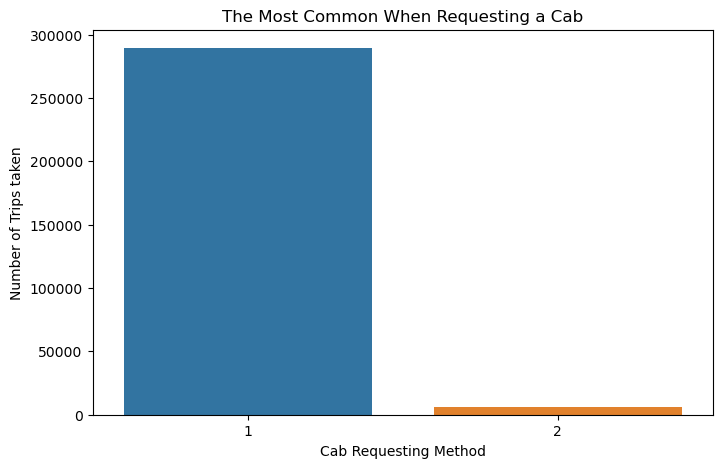

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

tripdata_df.rename(columns={'trip_type ': 'trip_type'}, inplace=True)

cab_request_counts = tripdata_df['trip_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=cab_request_counts.index, y=cab_request_counts.values)
plt.title('The Most Common When Requesting a Cab')
plt.xlabel('Cab Requesting Method')
plt.ylabel('Number of Trips taken')
plt.show()

In the provided code, I aimed to identify and visualize the top 5 drop-off locations based on the 'DOLocationID' in the dataset.

In the output, the drop-off locations are identified by their unique IDs (129, 75, 41, 42, 74), and the chart displays the number of trips to each of these locations. This analysis helps to identify the most frequently visited drop-off locations in the dataset, offering valuable insights into the patterns of taxi trips. When analysing, it can be seen that the most common drop-off location is 74 and the least common one is 129.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


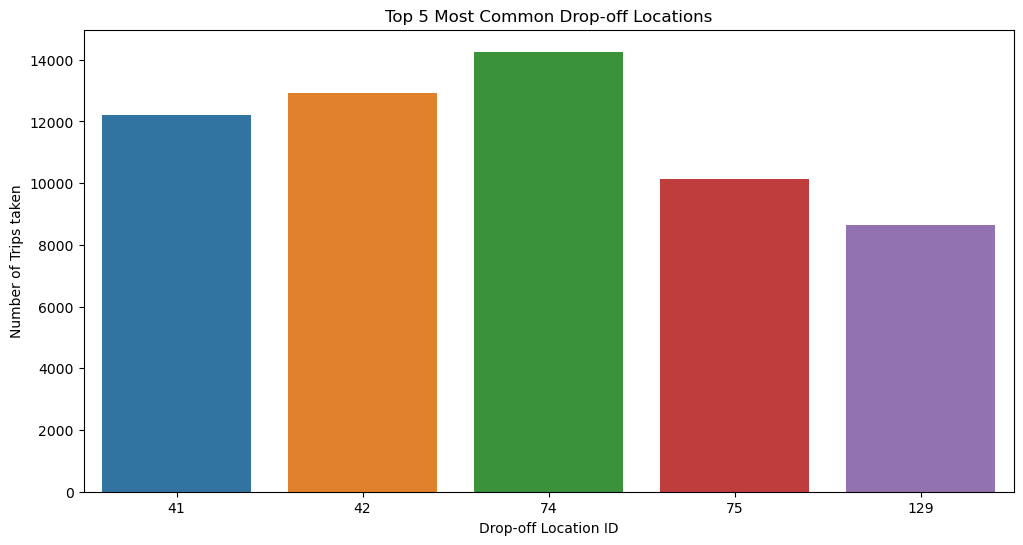

In [13]:
top_dropoff_locations = tripdata_df['DOLocationID'].value_counts().head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoff_locations.index, y=top_dropoff_locations.values)
plt.title('Top 5 Most Common Drop-off Locations')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Number of Trips taken')
plt.show()


## 3 Selecting Features

In building a predictive model for tip amount, I carefully consider feature selection to ensure the relevance and meaningful impact of chosen variables on the prediction. It is imperative to exclude the dependent variable, "tip_amount," as it serves as the target variable. Instead of using the total_amount directly, I consider a more detailed breakdown of individual charges, such as fare_amount, extra, mta_tax, tolls_amount, improvement_surcharge, and congestion_surcharge. This approach provides nuanced insights into trip costs, potentially aiding the model in understanding tipping determinants. I recognize the importance of temporal features derived from pickup and drop-off times, including the hour of the day, day of the week, and month, to capture time-related patterns.

Additionally, features related to trip distance (trip_distance) and duration (time difference between pickup and drop-off) are acknowledged as influential factors. Categorical variables like  RatecodeID, PULocationID, DOLocationID, and payment_type are deemed potential contributors to tipping behavior, and I ensure their appropriate encoding for effective integration into the model.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

The creation of a correlation matrix is a valuable step in feature selection for a machine learning model. It allows me to examine the relationships between numerical features in the dataset, helping to identify potential multicollinearity issues. Multicollinearity occurs when two or more features are highly correlated, which can lead to instability and redundancy in the model. By visualizing the correlation matrix, I can assess the strength and direction of linear associations between variables. This information is crucial for making informed decisions about which features to include in the predictive model.

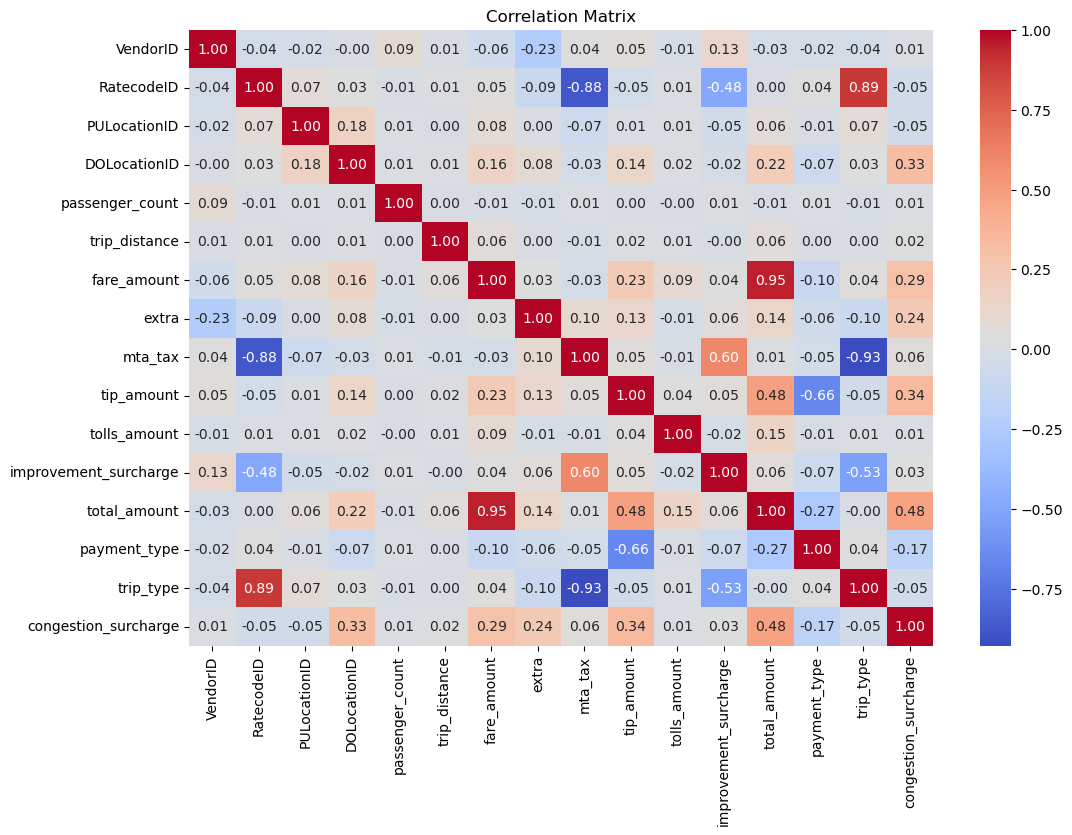

In [15]:
columns_numeric = tripdata_df.select_dtypes(include=['float64', 'int64'])

matrix_for_correlation = columns_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix_for_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In selecting features for building the model, I considered factors that I believe would play a crucial role in determining the tip amount for taxi trips. I included the following features:

- Trip Distance: I included trip distance as it is a fundamental factor that could influence the tip amount. Generally, passengers might be more inclined to give a higher tip for longer trips.
- Fare Amount: The base cost of the trip, represented by the fare amount, could significantly impact the tip. I anticipate that - passengers may consider the fare amount when deciding on the tip.
- Extra: I included the extra variable to account for any additional charges that might affect the tip. This could include charges for specific conditions or services.
- MTA Tax: The Metropolitan Transportation Authority (MTA) tax is a fixed charge for taxi trips. Including it in the features allows the model to capture the impact of this fixed tax on tips.
- Tolls Amount: Tolls paid during the trip could influence the tip amount. Passengers might be more willing to provide a tip if tolls were incurred during the journey.
- Improvement Surcharge: This surcharge is another additional charge that I included to assess its impact on tipping behavior.
- Congestion Surcharge: The congestion surcharge, related to congestion pricing in certain areas, is included to evaluate its influence on tips.

I decided not to include the 'total_amount' directly in the features because I believe breaking down the total amount into its individual charge components provides more transparency. This approach allows the model to discern the impact of each specific charge on the tip amount. Additionally, using individual charge components allows the model to assign varying weights to each, acknowledging their distinct impact on tipping preferences.

Also, I excluded the 'tip_amount' from the features since it is the target variable I aim to predict. Including the target variable in the features would introduce data leakage and compromise the integrity of the prediction task.

In [16]:
features_selected = ['trip_distance','fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
                     'improvement_surcharge','congestion_surcharge']

X = tripdata_df[features_selected]
y = tripdata_df['tip_amount']


## 4 Partition the data
#### Partition the prepared data into train/test sets and ensure that your partitions are reproducible.


In the process of preparing the data for modeling, I utilized the train_test_split function to split the dataset into training and testing sets. I specifically selected features that I considered relevant for predicting the tip amount, such as trip distance, fare amount, extra charges, taxes, tolls, improvement surcharge, and congestion surcharge. These features were assigned to the input variable X, while the target variable representing the tip amount (y) was also included. To ensure reproducibility, I set the test size to 20%, preserving 80% of the data for training. After the partitioning, I checked and confirmed the dimensions of the resulting training and testing sets. The training set consists of 236,219 samples, and the testing set contains 59,055 samples. This partitioning sets the stage for subsequent steps in building and evaluating the predictive model.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)


print(f"Training set dimensions are as follows: {X_train.shape}")
print(f"Testing set dimensions are as follows: {X_test.shape}") 

Training set dimensions are as follows: (236219, 7)
Testing set dimensions are as follows: (59055, 7)


## 5 Build a machine learning model
#### Using the Random Forest algorithm, build a machine learning model that predicts the tip amount.

In this step, I utilized the Random Forest algorithm to construct a machine learning model aimed at predicting the tip amount. I instantiated the RandomForestRegressor class from the scikit-learn library, setting the number of estimators (trees) to 100 for the forest and specifying a random state for reproducibility. Next, I trained the model using the fit method on the training set (X_train, y_train).

After training, I applied the trained model to make predictions on the test set (X_test) using the predict method. The predictions were stored in the y_pred variable, representing the model's estimated tip amounts for the corresponding features in the test set.

In [18]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)


## 6 Evaluation

I evaluated the machine learning model's performance by employing the Mean Squared Error (MSE) metric. The MSE quantifies the average squared differences between the predicted and actual values, offering insight into how well the model aligns with the true data. In this instance, I obtained an MSE value of 1.88, rounded to two decimal places.

Interpreting the MSE value, I can infer that, on average, the squared disparities between the predicted and actual tip amounts are relatively low. Lower MSE values indicate better model accuracy. In the context of predicting tip amounts, a value of 1.88 suggests that the model's predictions are generally close to the actual tip amounts.

In [19]:
mse = mean_squared_error(y_test, y_pred)
rounded_mse = round(mse, 2)

print(f"Mean Squared Error (MSE): {rounded_mse}")

Mean Squared Error (MSE): 1.88


## 7 Prediction capability

In this section, I aimed to assess and enhance the prediction capability of the Random Forest model for tip amounts. Initially, I built the model with 100 estimators and evaluated its performance using Mean Squared Error (MSE), obtaining an MSE value of 1.88. This provided a baseline for further comparison.

Subsequently, I experimented with tuning the model by adjusting the number of estimators. First, I decreased the number to 50, resulting in a slightly increased MSE of 1.89. Next, I increased the number to 150, which maintained an MSE of 1.89. Finally, I further increased the estimators to 200, yielding an MSE of 1.88. It's important to note that for each iteration, I constructed a new Random Forest regression model to evaluate the impact of changing the number of estimators.

Considering the results, it appears that variations in the number of estimators did not significantly impact the model's predictive accuracy, as the MSE values remained quite close. 

In [20]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse_initial = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for the Initial Model: {mse_initial:.2f}")


Mean Squared Error for the Initial Model: 1.88


In [21]:
rf_tuned_model_2 = RandomForestRegressor(n_estimators=50, random_state=42)
rf_tuned_model_2.fit(X_train, y_train)

y_pred_tuned_2 = rf_tuned_model_2.predict(X_test)

mse_tuned_2 = mean_squared_error(y_test, y_pred_tuned_2)
print(f"Mean Squared Error for the Tuned Model 2 is -> (n_estimators=50): {mse_tuned_2:.2f}")


Mean Squared Error for the Tuned Model 2 is -> (n_estimators=50): 1.89


In [22]:
rf_tuned_model_3 = RandomForestRegressor(n_estimators=150, random_state=42)
rf_tuned_model_3.fit(X_train, y_train)

y_pred_tuned_3 = rf_tuned_model_3.predict(X_test)

mse_tuned_3 = mean_squared_error(y_test, y_pred_tuned_3)
print(f"Mean Squared Error for the Tuned Model 3 is -> (n_estimators=150): {mse_tuned_2:.2f}")


Mean Squared Error for the Tuned Model 3 is -> (n_estimators=150): 1.89


In [23]:
rf_tuned_model_4 = RandomForestRegressor(n_estimators=200, random_state=42)
rf_tuned_model_4.fit(X_train, y_train)

y_pred_tuned_4 = rf_tuned_model_4.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned_4)
print(f"Mean Squared Error for the Tuned Model 4 is -> (n_estimators=200): {mse_tuned:.2f}")


Mean Squared Error for the Tuned Model 4 is -> (n_estimators=200): 1.88


In this code, I am conducting an experiment to assess how the Mean Squared Error of a Random Forest model varies with different values of n_estimators, which represents the number of trees in the forest. The goal is to identify the optimal number of trees that minimizes the MSE, thereby improving the model's predictive performance.

The code initializes a list, n_estimators_values, containing different values (50, 100, 150, and 200) for the number of trees. It then iterates through each value, building a new Random Forest model for each iteration. After making predictions on the test set, the code calculates the MSE and stores it in the mse_values dictionary, where the key is the number of trees (n_estimators) and the value is the corresponding MSE. The code generates a plot to visualize the relationship between the number of trees and MSE. The x-axis represents the different values of n_estimators, and the y-axis represents the corresponding MSE values. 

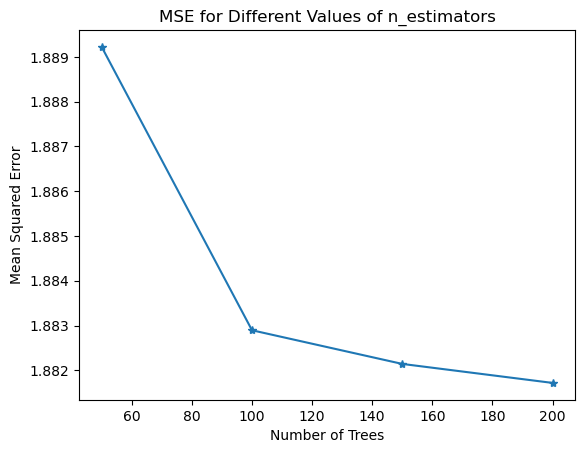

In [24]:
n_estimators_values = [50, 100, 150, 200]

mse_values = {}

for n_estimators in n_estimators_values:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values[n_estimators] = mse

plt.plot(mse_values.keys(), mse_values.values(), marker='*')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Values of n_estimators')
plt.show()


In [25]:
best_estimator_n = min(mse_values, key=mse_values.get)

best_random_forest_model = RandomForestRegressor(n_estimators=best_estimator_n, random_state=42)
best_random_forest_model.fit(X_train, y_train)

best_y_pred = best_random_forest_model.predict(X_test)

best_mse = mean_squared_error(y_test, best_y_pred)

print(f"Best Number of Trees is: {best_estimator_n}")
print(f"Mean Squared Error for the Best Model is: {best_mse:.2f}")


Best Number of Trees is: 200
Mean Squared Error for the Best Model is: 1.88


## 8 Feature Importance

In the feature importance analysis, I examined the contribution of each variable to the Random Forest model's predictions for tip amounts. The results revealed distinct patterns in the importance of different features. Notably, the most influential feature was the 'trip_distance,' having a feature importance that is higher than 0.4. It is followed by 'fare_amount' and 'congestion_surcharge'. Moving to moderately important features, 'extra' and 'mta_tax' contributing approximately 0.05 and 0.01, respectively. On the other hand, 'tolls_amount' and 'tip_percentage' basically did not have any kind of importance.


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


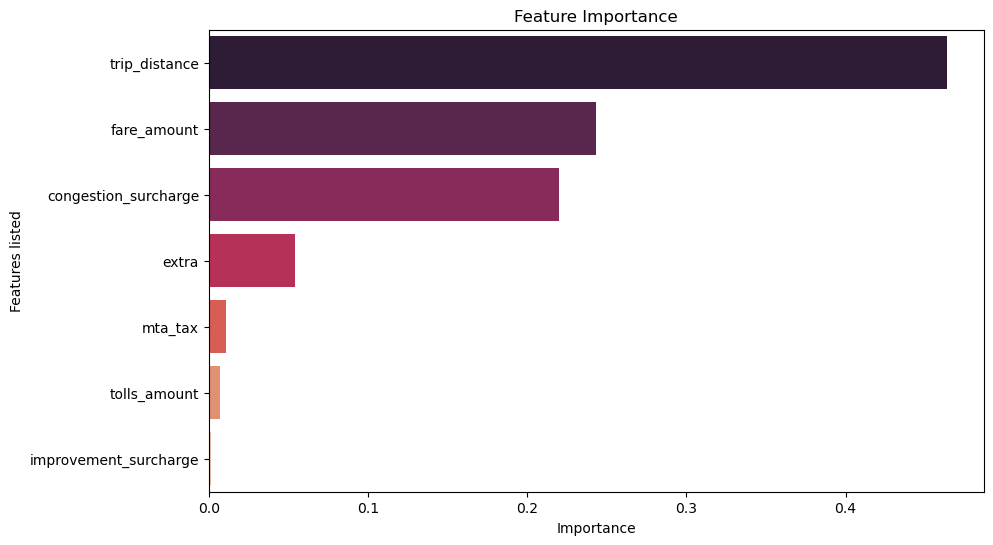

In [26]:
feature_importance = best_random_forest_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features listed')
plt.show()
